# Exploring and making the data visual

In [1]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import seaborn as sns
import matplotlib.pyplot as plt

In C:\Users\mdiez\anaconda\envs\ironhackpt\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\mdiez\anaconda\envs\ironhackpt\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\mdiez\anaconda\envs\ironhackpt\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\mdiez\anaconda\envs\ironhackpt\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\mdiez\anaconda\envs\

In [2]:
#Import Dataset
data = pd.read_csv("./output/data.csv")
data.head()

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26.0,"21,5",12,E10,0,0,0
1,12.0,4.2,30.0,"21,5",13,E10,0,0,0
2,11.2,5.5,38.0,"21,5",15,E10,0,0,0
3,12.9,3.9,36.0,"21,5",14,E10,0,0,0
4,18.5,4.5,46.0,"21,5",15,E10,0,0,0


Text(0.5, 0, 'Gas Type')

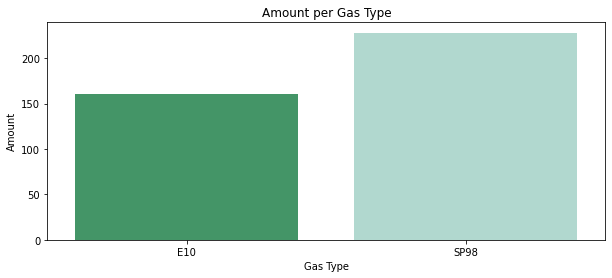

In [4]:
# Plot count values to see how many vañues do we have per gas type
plt.figure(figsize=(10,4))
gas_type = sns.countplot(x=data.gas_type, palette= "BuGn_r")
gas_type.set_title("Amount per Gas Type")
gas_type.set_ylabel("Amount")
gas_type.set_xlabel("Gas Type")

In [44]:
#Create a dataset only for E10
data_e10 = data[data["gas_type"]== "E10"]
data_e10

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
0,28.0,5.0,26.0,"21,5",12,E10,0,0,0
1,12.0,4.2,30.0,"21,5",13,E10,0,0,0
2,11.2,5.5,38.0,"21,5",15,E10,0,0,0
3,12.9,3.9,36.0,"21,5",14,E10,0,0,0
4,18.5,4.5,46.0,"21,5",15,E10,0,0,0
...,...,...,...,...,...,...,...,...,...
344,16.1,5.1,30.0,25,16,E10,1,1,0
345,16.0,4.0,42.0,22,15,E10,0,0,0
346,15.4,4.8,40.0,22,18,E10,0,0,0
347,17.2,3.9,35.0,22,16,E10,0,0,0


In [45]:
#Create a dataset only for SP98
data_sp98 = data[data["gas_type"]== "SP98"]
data_sp98

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun
44,5.4,3.3,32.0,"21,5",7,SP98,0,0,0
45,2.0,9.9,21.0,"21,5",4,SP98,0,0,0
46,14.2,5.1,32.0,"21,5",7,SP98,0,0,0
47,16.0,4.9,25.0,"21,5",8,SP98,0,0,0
48,11.8,4.9,25.0,"21,5",11,SP98,0,0,0
...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39.0,"24,5",18,SP98,0,0,0
384,16.1,4.3,38.0,25,31,SP98,1,0,0
385,16.0,3.8,45.0,25,19,SP98,0,0,0
386,15.4,4.6,42.0,25,31,SP98,1,0,0


<AxesSubplot:xlabel='consume', ylabel='Count'>

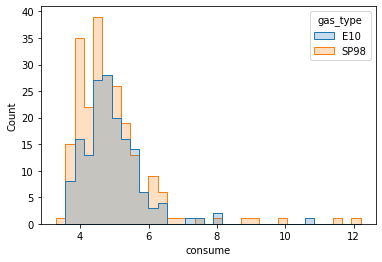

In [46]:
# Consume per Gas type, looks like Sp98 reach higher values
sns.histplot(x=data.consume,
             hue=data.gas_type,
             element="step")

<AxesSubplot:xlabel='gas_type', ylabel='consume'>

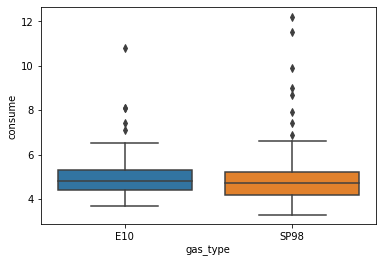

In [47]:
# Look for the mean of consume per gas type
sns.boxplot(x="gas_type", y="consume", data=data)


In [48]:
#E10 in mean consume more than Sp98
data_group = data.groupby(["gas_type"])[["consume"]].mean().sort_values("consume",ascending = False)[:3]
data_group

,consume
gas_type,
E10,4.931250
SP98,4.899123


<AxesSubplot:xlabel='distance', ylabel='consume'>

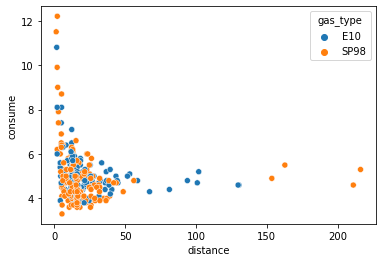

In [49]:
# The behavipur between both gas type looks similar between consume and distance
sns.scatterplot(x="distance",
                y="consume",
                hue="gas_type",
                data=data)

<AxesSubplot:xlabel='distance', ylabel='speed'>

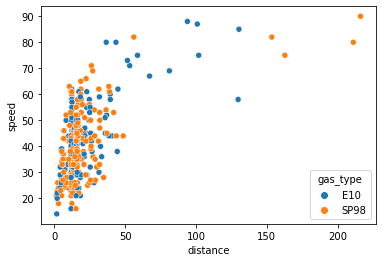

In [50]:
# The behavipur between both gas type looks similar between distance and speed

sns.scatterplot(x="distance",
                y="speed",
                hue="gas_type",
                data=data)

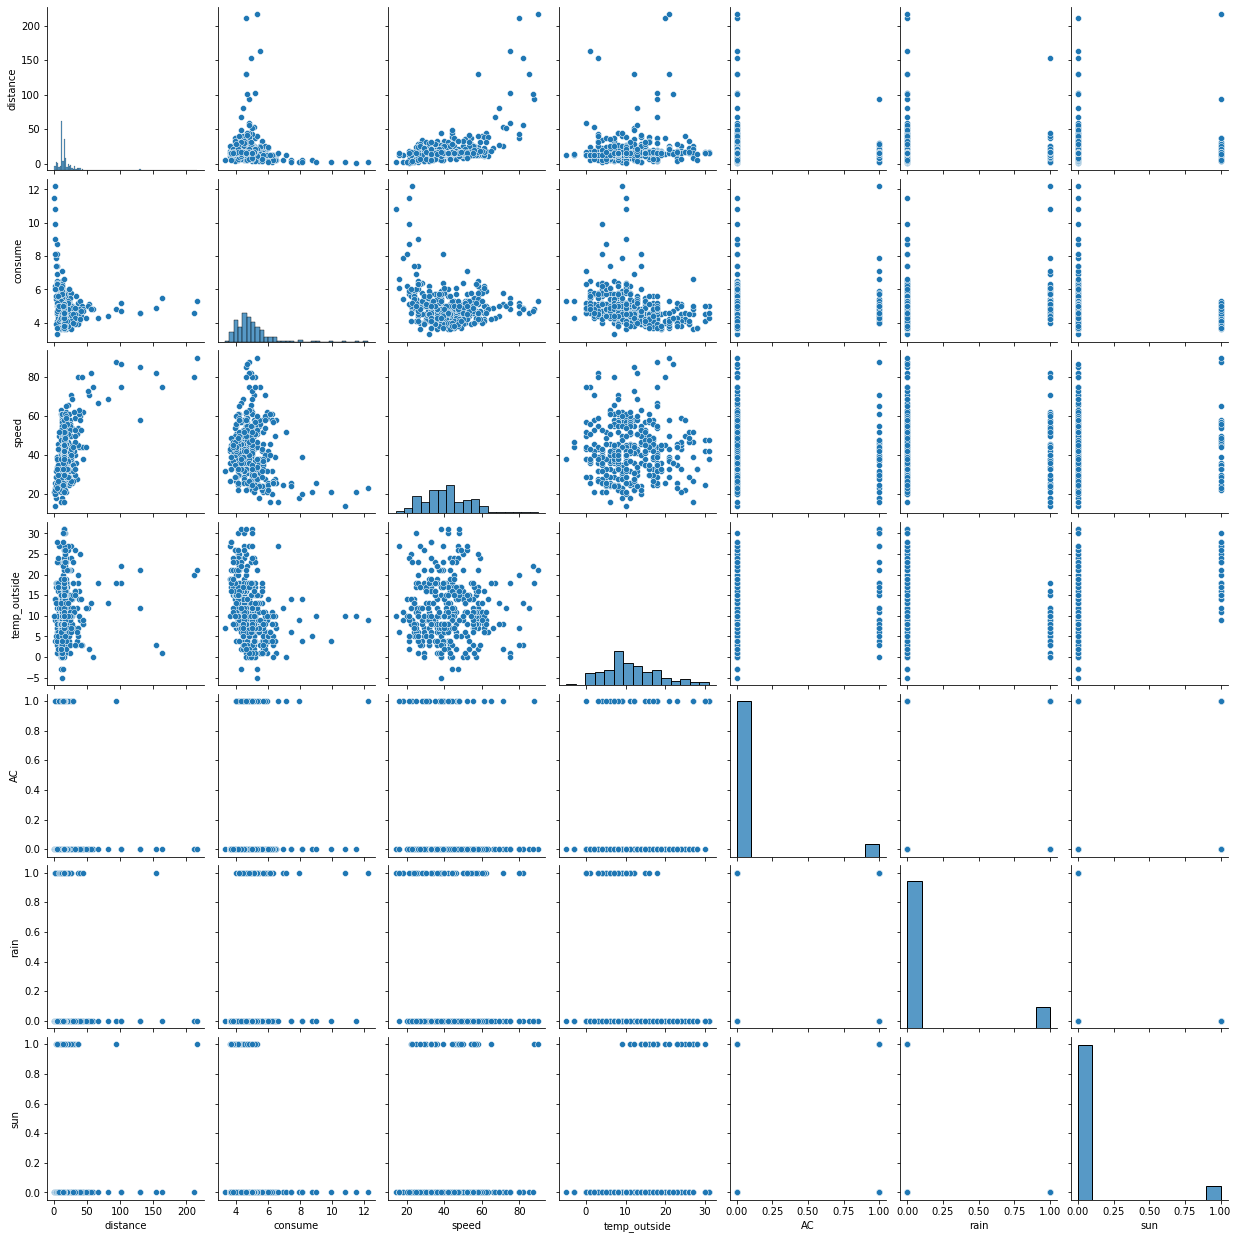

In [51]:
#look for correlations
sns.pairplot(data=data)

In [52]:
data.corr()


,distance,consume,speed,temp_outside,AC,rain,sun
distance,1.000000,-0.128967,0.562299,0.088175,-0.025738,-0.019791,0.081120
consume,-0.128967,1.000000,-0.227866,-0.320811,0.096591,0.248118,-0.170667
speed,0.562299,-0.227866,1.000000,0.015411,-0.035408,0.009489,0.081618
temp_outside,0.088175,-0.320811,0.015411,1.000000,0.167562,-0.186315,0.346903
AC,-0.025738,0.096591,-0.035408,0.167562,1.000000,0.242915,0.088598
rain,-0.019791,0.248118,0.009489,-0.186315,0.242915,1.000000,-0.112650
sun,0.081120,-0.170667,0.081618,0.346903,0.088598,-0.112650,1.000000


In [53]:
from sklearn.linear_model import LinearRegression


<AxesSubplot:xlabel='consume', ylabel='distance'>

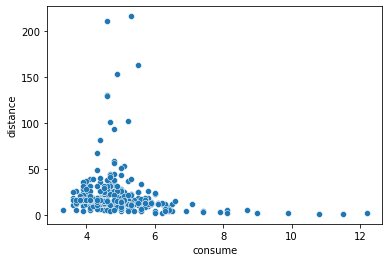

In [61]:
sns.scatterplot(x=data.consume, y=data.distance)


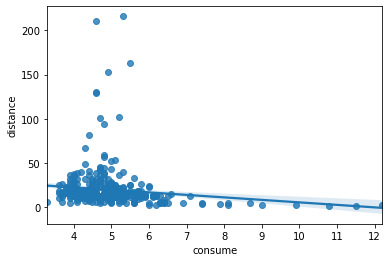

In [62]:
sns.regplot(x='consume', y='distance', data=data);
